In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score , recall_score
from imblearn.over_sampling import SMOTE 
import lightgbm as lgb 
data_df = pd.read_csv('NEW_dataset_csv.csv')

C:\Users\Sa\AppData\Local\Temp\ipykernel_22644\1852274097.py:12: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv('NEW_dataset_csv.csv')


In [2]:
x_data = data_df.iloc[:, 2:]
y_label = data_df[['type']]
z_label = data_df[['type']]
z_label.value_counts()
y_label.replace(['VEB', 'SVEB', 'F', 'Q'], 'Arrhythmia', inplace=True)
y_label.replace(['N'], 'Normal', inplace=True)

C:\Users\Sa\AppData\Local\Temp\ipykernel_22644\1430154249.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_label.replace(['VEB', 'SVEB', 'F', 'Q'], 'Arrhythmia', inplace=True)
C:\Users\Sa\AppData\Local\Temp\ipykernel_22644\1430154249.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_label.replace(['N'], 'Normal', inplace=True)


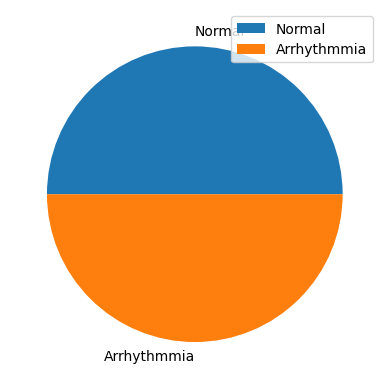

In [3]:
smote=SMOTE()
x_re,y_re = smote.fit_resample(x_data,y_label)
y_re.value_counts()
after=y_re.value_counts()
plt.pie(after,labels=['Normal','Arrhythmmia'],explode=[0,0])
plt.legend()
plt.show()

In [4]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(y_re)

C:\Users\Sa\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
y = pd.DataFrame(Y)  
y.value_counts()
y

,0
0,1
1,1
2,1
3,0
4,1
...,...
811643,0
811644,0
811645,0
811646,0


In [6]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled=min_max_scaler.fit_transform(x_re)
X_scaled_df = pd.DataFrame(X_scaled)
X_scaled_df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.076668,0.078051,0.289567,0.620255,0.659809,0.632061,0.699101,0.088235,0.006711,0.072508,...,0.613453,0.053846,0.010870,0.051220,0.023364,0.613453,0.576731,0.531004,0.533028,0.535700
1,0.077615,0.078524,0.278288,0.673848,0.600650,0.658253,0.681045,0.017647,0.026846,0.033233,...,0.623459,0.057692,0.021739,0.060976,0.028037,0.623459,0.590220,0.543876,0.547873,0.549922
2,0.078088,0.048250,0.292260,0.680406,0.606461,0.663929,0.624139,0.035294,0.161074,0.096677,...,0.601527,0.126923,0.065217,0.121951,0.023364,0.601527,0.570970,0.530823,0.546194,0.599753
3,0.047799,0.109272,0.296794,0.647008,0.598738,0.605809,0.684626,0.023529,0.013423,0.033233,...,0.620149,0.080769,0.043478,0.078049,0.014019,0.620149,0.587954,0.554339,0.587392,0.614056
4,0.108850,0.078051,0.324490,0.674652,0.600241,0.657854,0.678108,0.017647,0.221477,0.120846,...,0.604956,0.123077,0.021739,0.100000,0.023364,0.604956,0.579630,0.532057,0.537198,0.591114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811643,0.043540,0.050142,0.290132,0.614498,0.666308,0.645259,0.691099,0.076471,0.067114,0.069486,...,0.617716,0.023077,0.000000,0.017073,0.000000,0.617716,0.580872,0.525161,0.525499,0.562364
811644,0.079508,0.065752,0.290979,0.614432,0.689818,0.642803,0.699037,0.141176,0.026846,0.093656,...,0.573660,0.011538,0.027174,0.043902,0.046729,0.573660,0.523477,0.453215,0.443798,0.475130
811645,0.023663,0.023652,0.285684,0.753458,0.765317,0.506005,0.681996,0.094118,0.026846,0.102719,...,0.595133,0.030769,0.000000,0.029268,0.014019,0.595133,0.554110,0.526666,0.541740,0.485448
811646,0.067203,0.134342,0.280392,0.680405,0.719574,0.699326,0.684332,0.223529,0.020134,0.132931,...,0.520471,0.019231,0.059783,0.087805,0.088785,0.520471,0.450965,0.382688,0.359614,0.394421


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, random_state=101,test_size=0.3)

In [8]:
d_train = lgb.Dataset(X_train,y_train)

In [9]:
params = {
    "objective": "binary",            # Binary classification
    "metric": "binary_logloss",       # Suitable metric for binary tasks
    "boosting_type": "gbdt",          # Standard gradient boosting
    "learning_rate": 0.05,            # Start with a conservative learning rate
    "num_leaves": 31,                 # Control complexity (can tune between 20-40)
    "max_depth": -1,                  # No depth limit; set to 5-10 for faster results
    "feature_fraction": 0.8,          # Fraction of features to use per iteration
    "bagging_fraction": 0.8,          # Fraction of data for each iteration
    "bagging_freq": 5,                # Bagging every 5 iterations
    "min_data_in_leaf": 20,           # Avoid overfitting by limiting samples in leaves
    "lambda_l1": 0.1,                 # L1 regularization to reduce overfitting
    "lambda_l2": 0.1,                 # L2 regularization to reduce overfitting
    "verbose": -1                     # Suppress detailed output
}

In [10]:
clf=lgb.train(params,d_train)

In [11]:
y_pred_lgbm = clf.predict(X_test)

In [12]:
y_pred_lgbm_df = pd.DataFrame(y_pred_lgbm)
y_pred_lgbm_df

,0
0,0.002668
1,0.001051
2,0.000417
3,0.998275
4,0.998472
...,...
243490,0.843904
243491,0.001232
243492,0.999553
243493,0.999688


In [13]:
for i in range(0, X_test.shape[0]):
    # Use .iloc to access the individual element at index i
    if y_pred_lgbm_df.iloc[i, 0] >= 0.5:  # Access the first column value at index i
        y_pred_lgbm_df.iloc[i, 0] = 1  # Set to 1 if the condition is met
    else:
        y_pred_lgbm_df.iloc[i, 0] = 0  # Set to 0 if the condition is not met

In [14]:
cm = confusion_matrix(y_test,y_pred_lgbm_df)
cm

array([[120194,   1414],
       [  1616, 120271]], dtype=int64)

In [15]:
acc=accuracy_score(y_test,y_pred_lgbm_df)
acc

0.9875562126532372

In [16]:
recall_score(y_test,y_pred_lgbm_df,pos_label=0)

0.9883724754950333

In [17]:
precision_score(y_test,y_pred_lgbm_df,pos_label=0)

0.9867334373204171

In [18]:
f1_score(y_test, y_pred_lgbm_df)

0.9875601464864598

In [19]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred_lgbm_df)

0.975112439945644

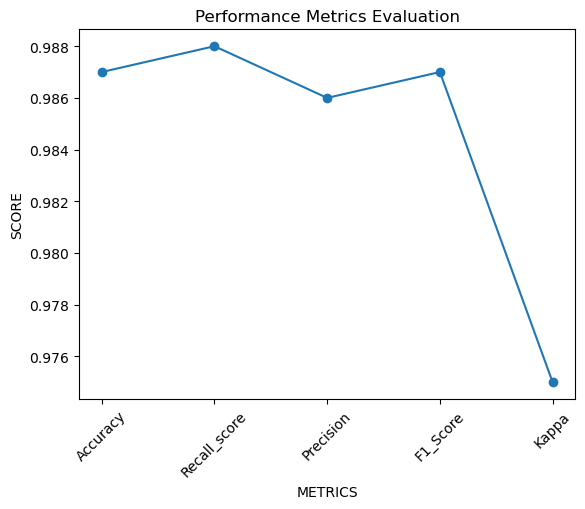

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Use descriptive text directly as x values
x_labels = np.array(["Accuracy", "Recall_score", "Precision", "F1_Score", "Kappa"])
y = np.array([0.987, 0.988, 0.986, 0.987,0.975])

plt.plot(x_labels, y, marker='o')  # Use text labels as x-axis values

plt.xlabel("METRICS")
plt.ylabel("SCORE")
plt.title("Performance Metrics Evaluation")

plt.xticks(rotation=45)  
plt.show()